In [21]:
from tensorflow import keras                           #模型2
import tensorflow as tf                               #匯入模型
import tkinter as tk

from tkinter import filedialog
import matplotlib.pyplot as plt
import numpy as np
import random
import os                                              #匯入
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [22]:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels),(test_images,test_labels) = mnist.load_data()

In [23]:
EAGER = True #TensorFlow 的 Eager Execution 是一种命令式编程环境，可立即评估运算

In [24]:
model = keras.Sequential([
    #(-1,28,28)->(-1,100)
    keras.layers.SimpleRNN(
    # for batch_input_shape, if using tensorflow as the backend, we have to put None for the batch_size.
    # Otherwise, model.evaluate() will get error.
    input_shape=(28, 28),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
    units=256,
    unroll=True),
    keras.layers.Dropout(rate=0.2),
    #(-1,256)->(-1,10)
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [25]:
training_images  = training_images / 255.0
test_images = test_images / 255.0                                   #定位點中心

In [31]:
lr = 0.001
epochs = 20
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(lr),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=epochs,validation_data=[test_images[:1000],test_labels[:1000]])

Epoch 1/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5142 - accuracy: 0.8150 - val_loss: 0.4516 - val_accuracy: 0.8370
Epoch 2/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5113 - accuracy: 0.8164 - val_loss: 0.5068 - val_accuracy: 0.8290
Epoch 3/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5432 - accuracy: 0.8058 - val_loss: 0.5420 - val_accuracy: 0.8200
Epoch 4/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5139 - accuracy: 0.8164 - val_loss: 0.4594 - val_accuracy: 0.8410
Epoch 5/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5106 - accuracy: 0.8171 - val_loss: 0.5036 - val_accuracy: 0.8260
Epoch 6/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5335 - accuracy: 0.8078 - val_loss: 0.4754 - val_accuracy: 0.8330
Epoch 7/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.5515 - accuracy: 0.8013 - val_loss: 0.5460 -

In [32]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 256)               72960     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
model.evaluate(test_images, test_labels)  #測試

313/313 [==============================] - 4s 12ms/step - loss: 0.7736 - accuracy: 0.7248


[0.77363520860672, 0.7247999906539917]

預測值: [1.7923344e-03 5.0011371e-05 1.2537343e-03 1.8200198e-03 4.8356651e-05
 2.3155510e-02 1.4300472e-03 1.4960028e-01 2.2942721e-04 8.2062030e-01]

預測是 Ankle boot 正確答案是 Ankle boot


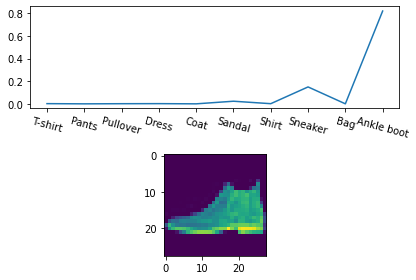

In [34]:
classifications = model.predict(test_images)   #預測
print("預測值:",classifications[0])
print("")
x=[0,1,2,3,4,5,6,7,8,9]  #製圖
y=classifications[0]
values = ['T-shirt','Pants', 'Pullover', 'Dress', 'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'] 
plt.subplot(2,1,1)
plt.plot(x,y)
plt.xticks(x,values,rotation=-15)
max=0
for i in range(10):
    if max<y[i]:
        max=y[i]
        ans=i
for i in range(10):
    if ans==i:
        if test_labels[0]==ans:
            print("預測是",values[i],"正確答案是",values[i])
plt.subplot(2, 1, 2)
plt.tight_layout()
plt.imshow(test_images[0])

預測值: [1.34710753e-02 8.90918309e-04 2.14132713e-03 5.49205055e-04
 6.34390090e-05 8.87595296e-01 1.48849925e-02 5.22845127e-02
 5.15262689e-03 2.29666084e-02]

預測是 Sandal 正確答案是 Sandal


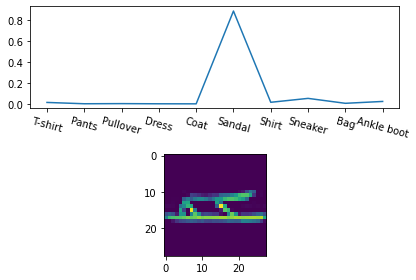

In [35]:
classifications = model.predict(test_images)   #預測
test_random=random.randint(0,9999)
print("預測值:",classifications[test_random])
print("")
x=[0,1,2,3,4,5,6,7,8,9]  #製圖
y=classifications[test_random]
values = ['T-shirt','Pants', 'Pullover', 'Dress', 'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'] 
plt.subplot(2,1,1)
plt.plot(x,y)
plt.xticks(x,values,rotation=-15)
max=0
for i in range(10):
    if max<y[i]:
        max=y[i]
        ans=i
for i in range(10):
    if ans==i:
        if test_labels[test_random]==ans:
            print("預測是",values[i],"正確答案是",values[i])
plt.subplot(2, 1, 2)
plt.tight_layout()
plt.imshow(test_images[test_random])